###   <span style = "color:red">About this dataset:</span>



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import colormaps
import itertools
from sklearn.metrics import precision_score, recall_score, confusion_matrix,\
classification_report, accuracy_score, f1_score, log_loss, jaccard_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and displaying the dataset
df = pd.read_csv("heart_fo.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

#### Checking for missing values in the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
columns = df.columns
i = 0
for column in columns:
    if df[column].dtypes == object:
        i += 1
print("number of columns with object type:", i)

number of columns with object type: 0


In [8]:
# Performing Univariate Analysis for statistical description and understanding of data dispersion
df.describe().T\
.style.background_gradient(subset=["min", "mean", "max"], cmap="OrRd")

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [9]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='output', ylabel='count'>

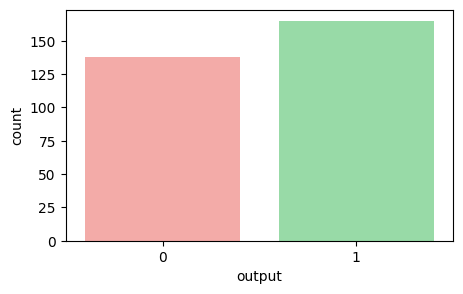

In [10]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(5, 3))
sns.countplot(x=df["output"], palette=['#ff9f9b', '#8de5a1'])

<Axes: >

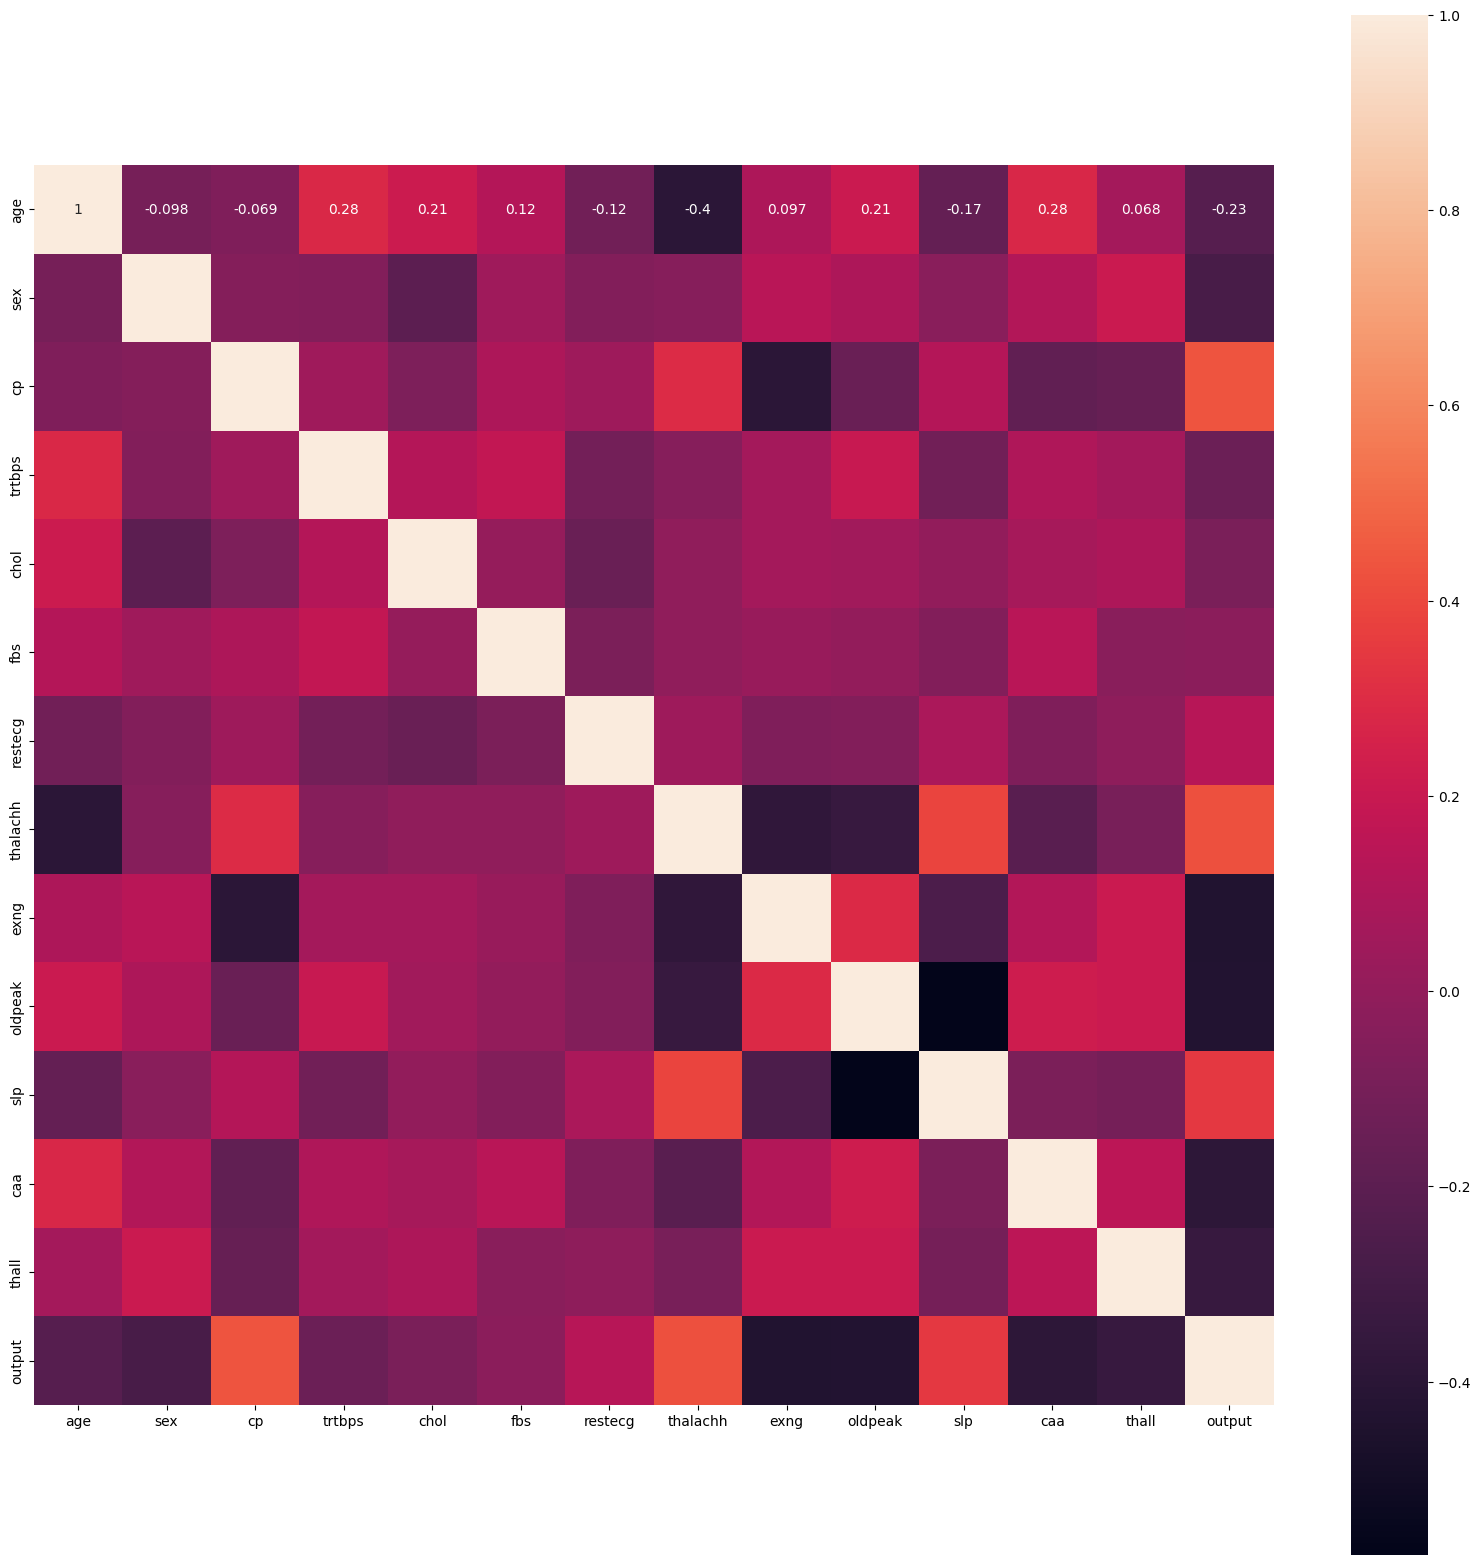

In [11]:
# Performing Bivariate Analysis by examining a correlation matrix of all the features using a heatmap
corrmat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10}, square=True)

In [12]:
cols = ['#ff9f9b', '#8de5a1']

In [13]:
d = df["output"].astype(str)

Text(0.5, 1.0, 'Distribution Of Age')

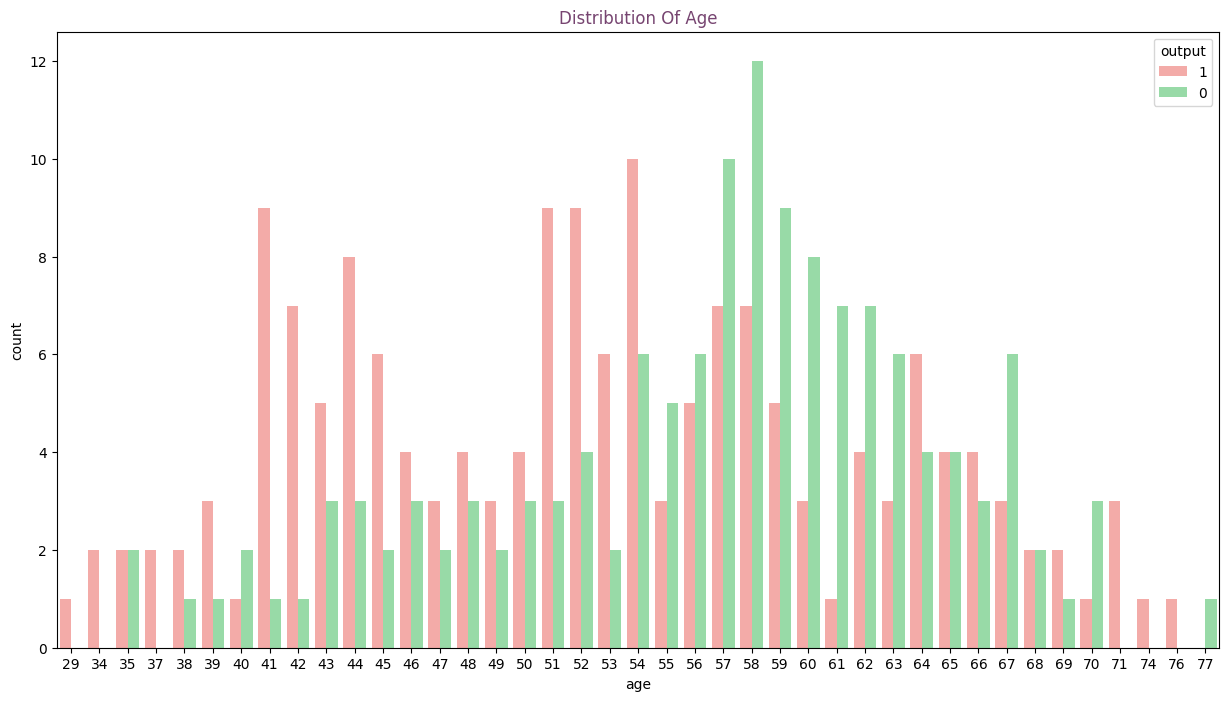

In [14]:
# Evaluating age distribution with respect to output
plt.figure(figsize=(15, 8))
age_output=sns.countplot(data=df, x=df["age"], hue=d, palette=cols)
age_output.set_title("Distribution Of Age", color="#774571")

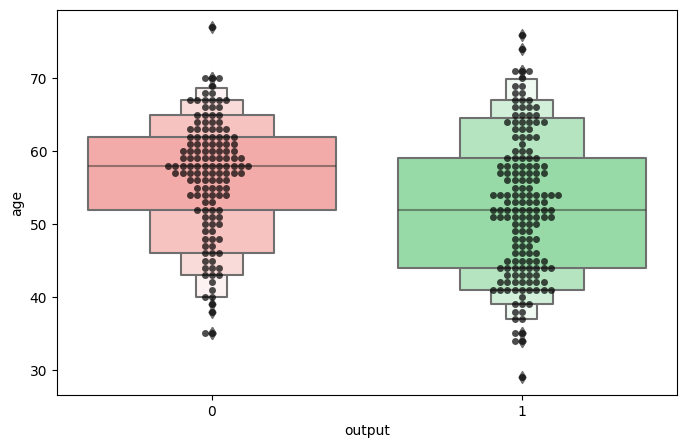

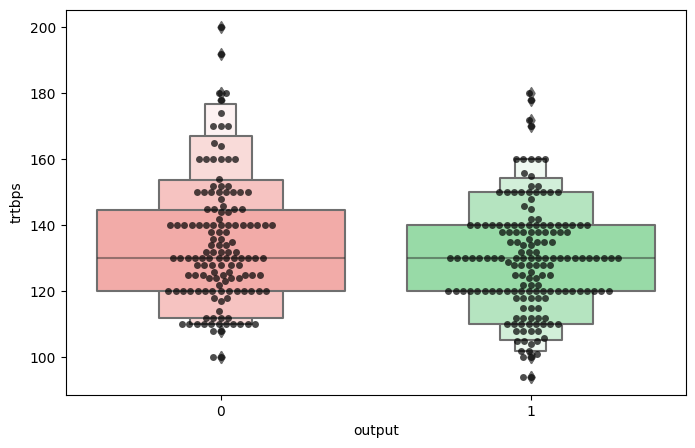

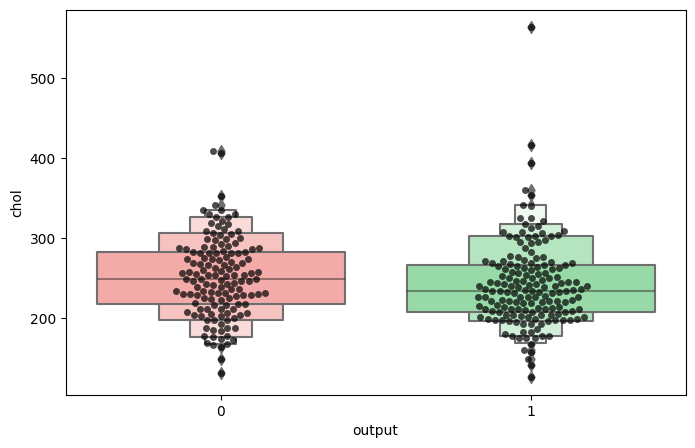

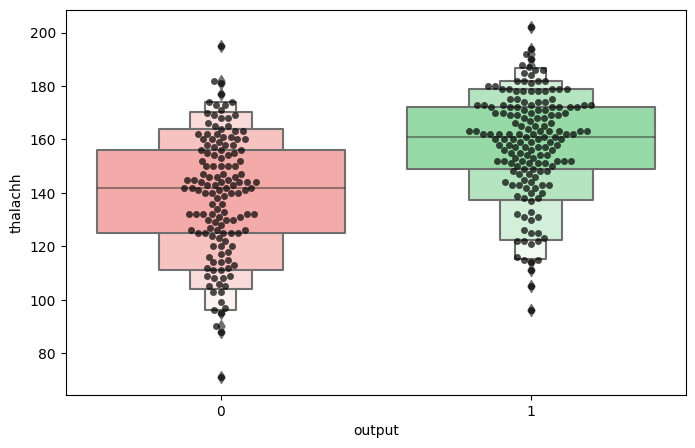

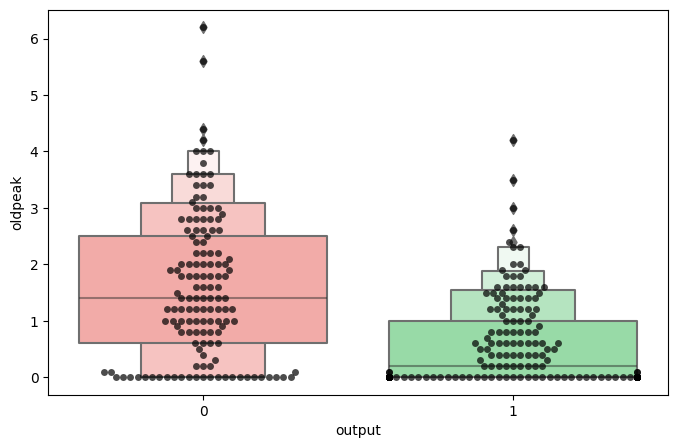

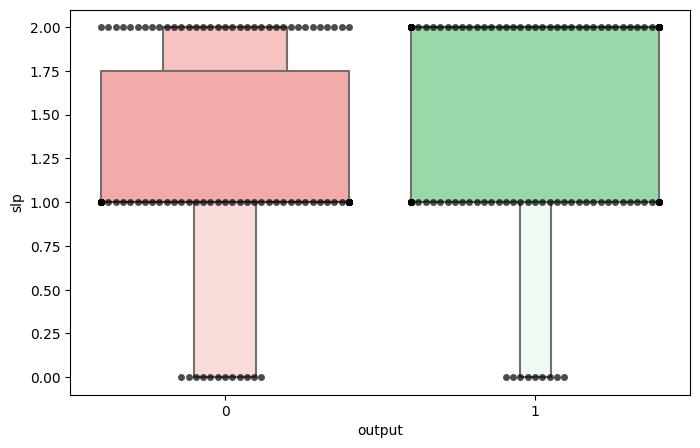

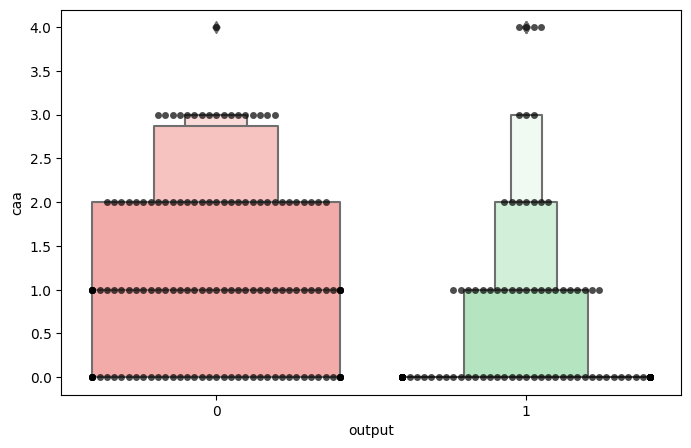

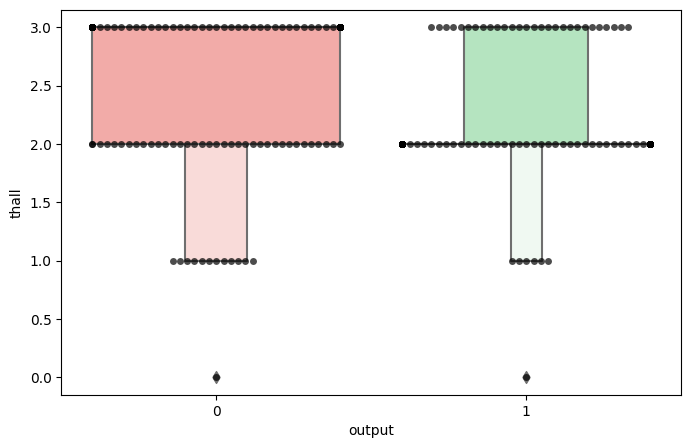

In [15]:
# Checking for potential outliers using "Boxen and Swarm plots" of non-binary features
features = ["age", "trtbps", "chol", "thalachh", "oldpeak", "slp", "caa", "thall"]

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.swarmplot(x=df["output"], y=df[feature], color="black", alpha=0.7)
    sns.boxenplot(x=df["output"], y=df[feature], palette=cols)
    plt.show()

In [16]:
# Defining independent and dependent attributes in training and test sets
x = df.drop(["output"], axis=1).values
y = df["output"].values

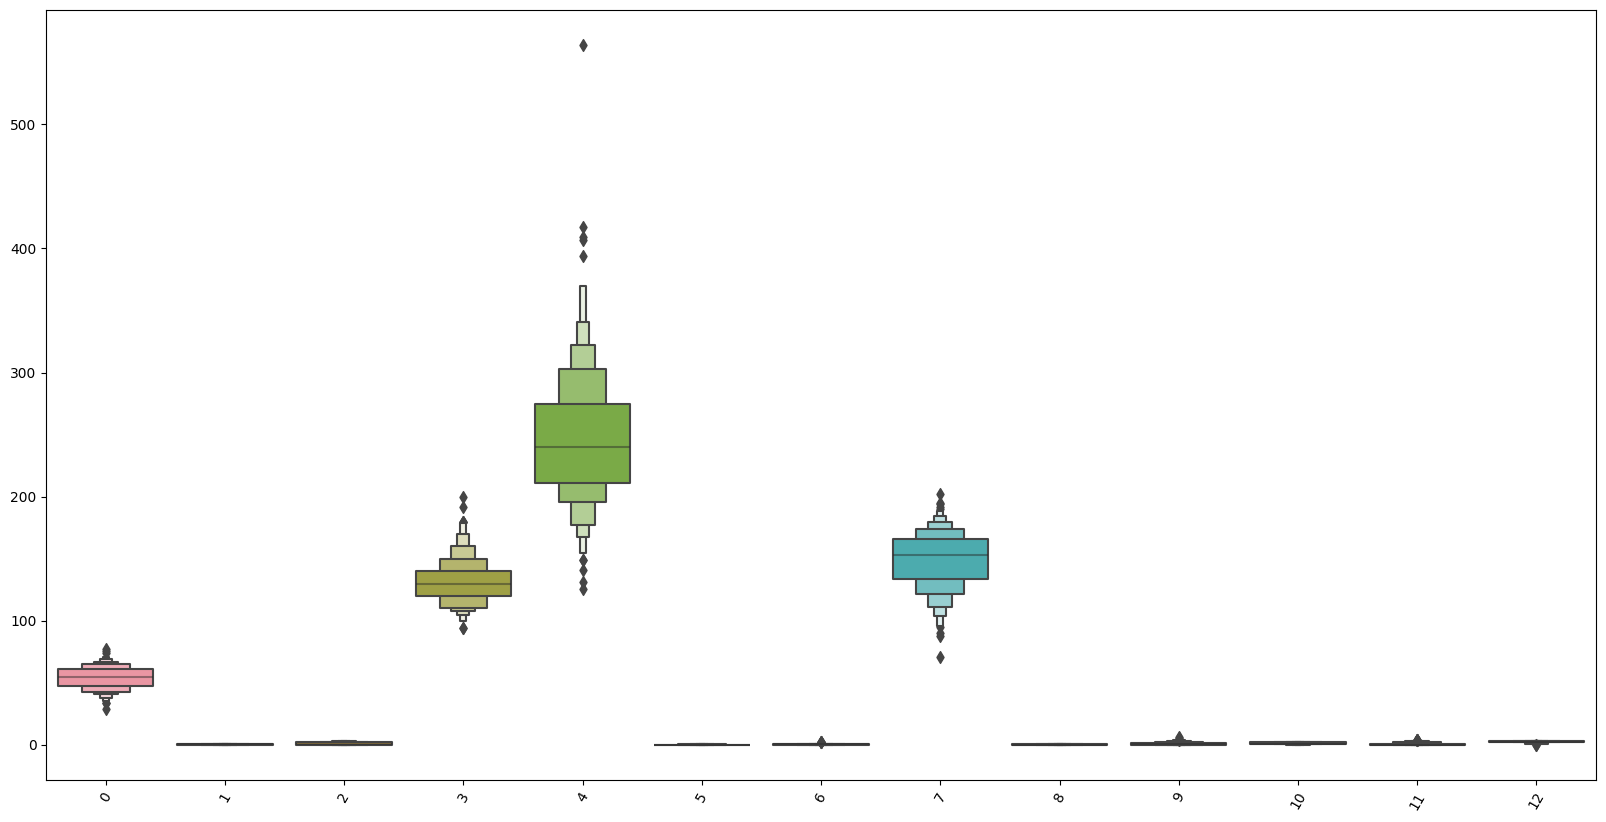

In [19]:
# Before scaling the data
plt.figure(figsize=(20,10))
sns.boxenplot(data=x)
plt.xticks(rotation=60)
plt.show()

In [20]:
# Setting up a Standard Scaler for the features and analyzing the scaled data
pss = preprocessing.StandardScaler()
x = pss.fit_transform(x)

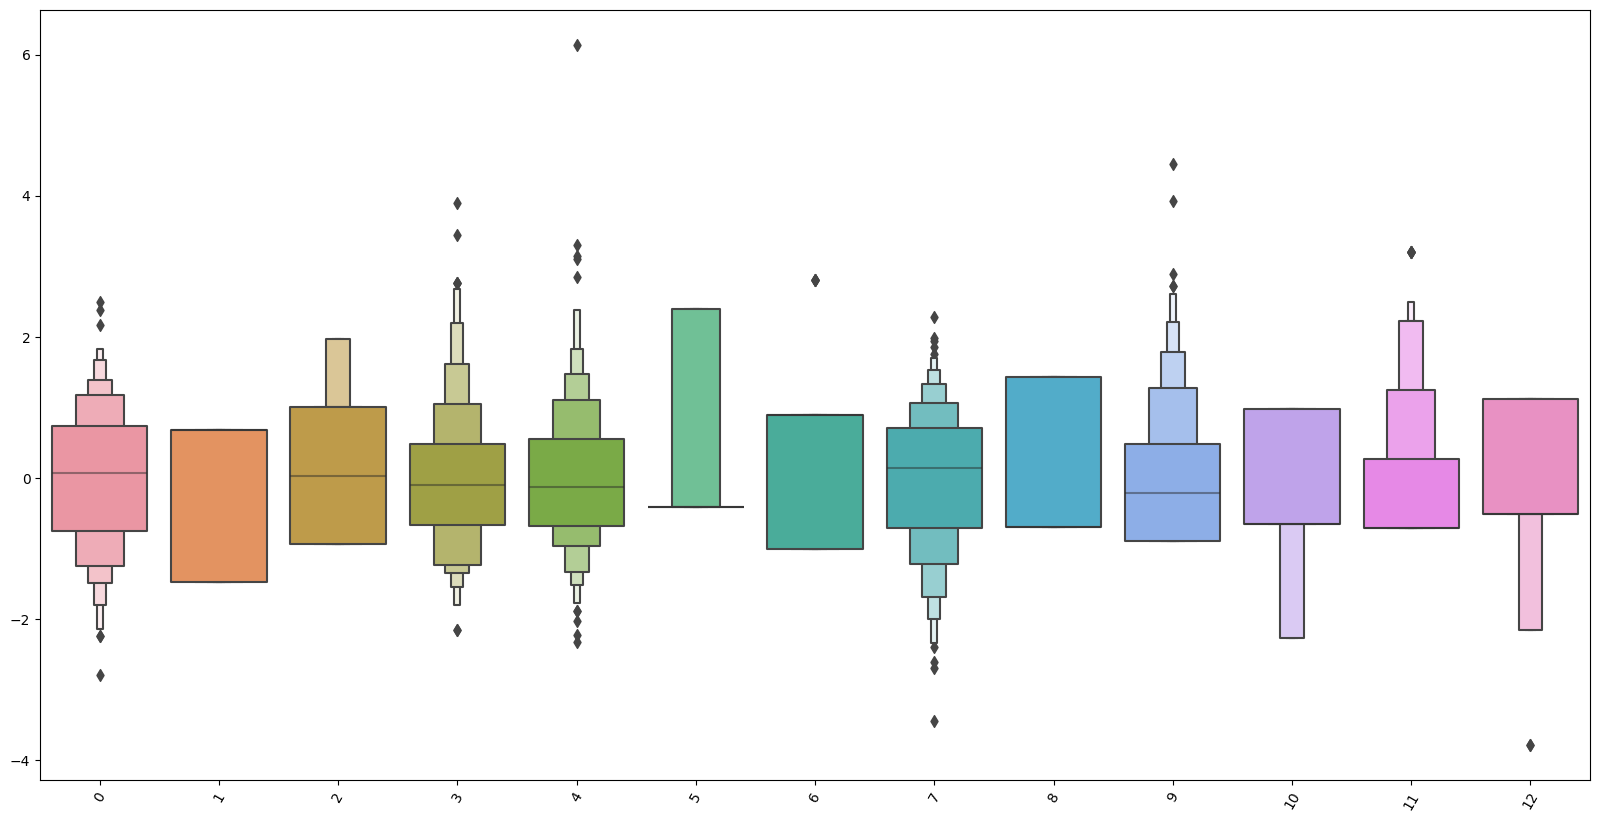

In [21]:
# After scaling the data
# Plotting the scaled features using boxen plots
plt.figure(figsize=(20, 10))
sns.boxenplot(data=x)
plt.xticks(rotation=60)
plt.show()

In [22]:
# Splitting variables into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Instantiating the Logistic Regression algorithm
# Fitting the SVM model
LR = LogisticRegression(C=0.01, solver="liblinear").fit(x_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [24]:
# Predicting the test variables
y_hat = LR.predict(x_test)
print(y_hat[0:5])
print(y_test[0:5])

[0 1 1 0 1]
[0 0 1 0 1]


In [25]:
# Getting the accuracy score,log_loss, jaccard_score
# Calculating confusion_matrix and classification_report
acc = accuracy_score(y_test, y_hat)
lls = log_loss(y_test, y_hat)
jac = jaccard_score(y_test, y_hat, pos_label=0)
cnf = confusion_matrix(y_test, y_hat, labels=[0,1])
cla = classification_report(y_test, y_hat)

In [26]:
print("\naccuracy:\n", acc)
print("\nlog_loss:\n", lls)
print("\njaccard_score:\n", jac)
print("\nclassification_report:\n", cla)


accuracy:
 0.8852459016393442

log_loss:
 4.136156946292132

jaccard_score:
 0.78125

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [27]:
# Calculating and plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  4]
 [ 3 29]]


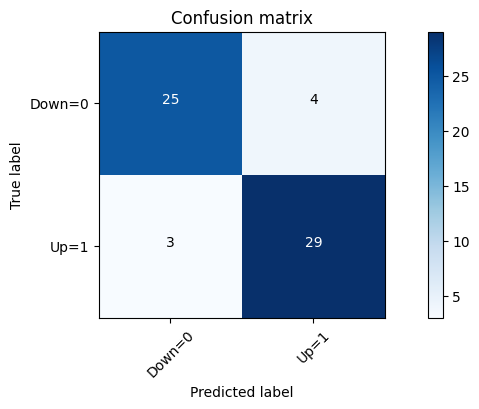

In [28]:
plt.figure(figsize=(9, 4))
plot_confusion_matrix(cnf, classes=["Down=0", "Up=1"],normalize= False,  title='Confusion matrix')